In [1]:
import numpy as np

from baseline import baseline
from sample import sample

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import NMF

Load our large image and sample a smaller chunk of that image:

In [2]:
image = np.load('image2.npy')

In [3]:
im = sample(image, 32)

In [36]:
im.shape # can we scroll through all the wavenumbers? that would be so cool

(32, 32, 1128)

Initialize NMF model and flatten image to run NMF:

In [4]:
nmf = NMF(n_components = 2, solver = 'cd', tol = 1e-5, max_iter=int(1e6), l1_ratio = 0.2, alpha = 1e-3, random_state = 0, verbose = False)

In [5]:
im2d = np.zeros((im.shape[0]**2, im.shape[2]))
for i in range(im.shape[2]):
    im2d[:,i] = im[:,:,i].flatten()

In [6]:
W_mat = nmf.fit_transform(X = im2d + abs(np.min(im2d)))

In [7]:
H_mat = nmf.components_

for i in range(H_mat.shape[0]):
    base_i = baseline(H_mat[i,:])
    H_mat[i,:] = H_mat[i,:] - base_i

Let's look at our resulting coefficient images:

In [8]:
coefficients = W_mat.reshape((32,32,2))

Text(0.5, 1.0, 'PS Coefficients')

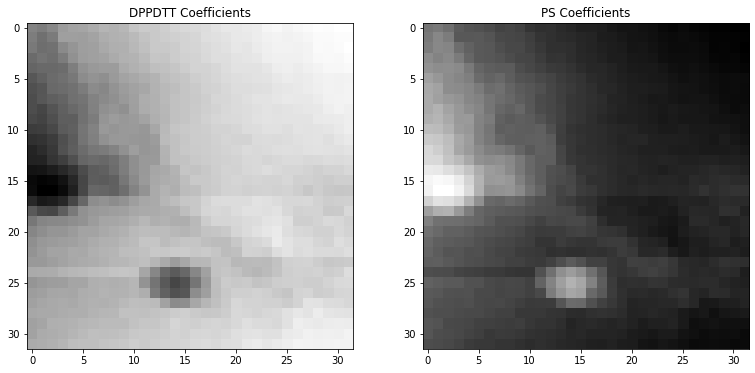

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = (13,6))

ax[0].imshow(coefficients[:,:,0], cmap = 'gray')
ax[0].set_title('DPPDTT Coefficients')

ax[1].imshow(coefficients[:,:,1], cmap = 'gray')
ax[1].set_title('PS Coefficients')

Normalize the images to the sum of each other:

In [11]:
threshold_mtx = np.zeros_like(coefficients[:,:,0])

dppdtt_co = coefficients[:,:,0]
ps_co = coefficients[:,:,1]

In [13]:
for i in range(threshold_mtx.shape[0]):
    for j in range(threshold_mtx.shape[1]):
        threshold_mtx[i][j] = dppdtt_co[i][j]/(dppdtt_co[i][j] + ps_co[i][j])
        # threshold matrix is relative to dppdtt

Text(0.5, 1.0, 'Threshold Matrix relative to DPPDTT')

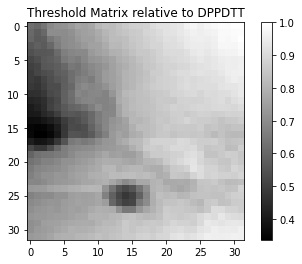

In [18]:
plt.imshow(threshold_mtx, cmap = 'gray')
plt.colorbar()
plt.title('Threshold Matrix relative to DPPDTT')

In [34]:
np.save('threshold_mtx', threshold_mtx)

Create mask with 50% threshold:

In [19]:
mask = np.zeros_like(threshold_mtx)

In [22]:
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if threshold_mtx[i][j] >= 0.5:
            mask[i][j] = 1
        else:
            mask[i][j] = 0

Text(0.5, 1.0, '50% DPPDTT Mask')

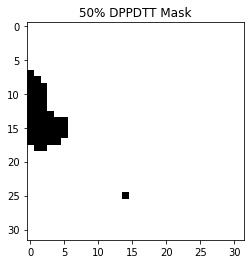

In [23]:
plt.imshow(mask, cmap = 'gray')
plt.title('50% DPPDTT Mask')

Display mask, original image, and mask over reconstructed image!

Text(0.5, 1.0, 'Mask Overlayed')

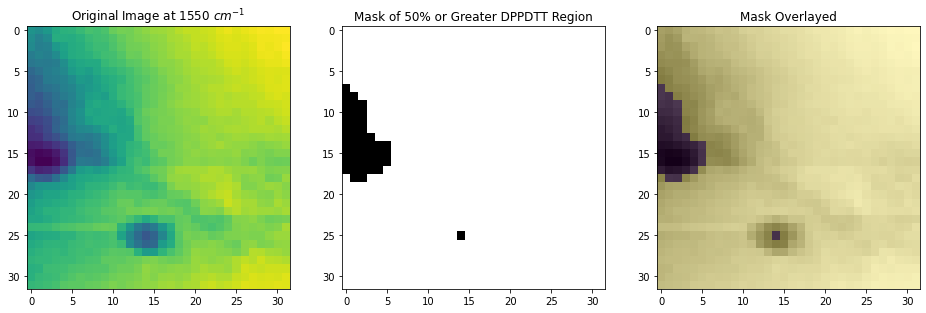

In [33]:
fig, ax = plt.subplots(ncols = 3, figsize = (16,5))

ax[0].imshow(im[:,:,1550-750]) # indexed from 0 but wavenumbers range from 750 to 1878
ax[0].set_title('Original Image at 1550 $cm^{-1}$')

ax[1].imshow(mask, cmap = 'gray')
ax[1].set_title('Mask of 50% or Greater DPPDTT Region')

ax[2].imshow(im[:,:,1550-750], cmap = 'gray')
ax[2].imshow(mask, alpha = 0.3)
ax[2].set_title('Mask Overlayed')

In [30]:
value = np.sum(mask) / (mask.shape[0]**2)

In [32]:
value # percent of area that's greater than 50% DPPDTT

0.9560546875

To do:
- [ ] Create function that creates mask
- [ ] Import as .py files 

Muammer - contour plot

Maddie - turn things .py files

Caitlin - region props

Preetham - interactive image/plot